<a href="https://colab.research.google.com/github/SavintsevaS/BigDataNSU/blob/main/%D0%9A%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D0%BD%D1%8B%D0%B9_%D0%B1%D0%BE%D1%82_%D0%BF%D0%BE_%D0%B4%D1%80%D0%B5%D0%B2%D1%83_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytelegrambotapi
import matplotlib
from matplotlib import pyplot as plt
from sklearn import tree
!wget "https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1_KRd0cy-lIIkzctAkzTl98A485LBBCZV" -O credit.csv

     |████████████████████████████████| 152 kB 637 kB/s 
  Created wheel for pytelegrambotapi: filename=pyTelegramBotAPI-4.4.1-py3-none-any.whl size=133681 sha256=0ac50537dd84743ce926578bc8bf7ea8fb5f942edae57942d8abd8211e74f8e6
  Stored in directory: /root/.cache/pip/wheels/39/5a/70/92c4fde2df1ad280b2004541502b1588f4a03363daf61e3275
Successfully built pytelegrambotapi
--2022-04-21 11:18:25--  https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1_KRd0cy-lIIkzctAkzTl98A485LBBCZV
Resolving drive.google.com (drive.google.com)... 108.177.127.101, 108.177.127.138, 108.177.127.113, ...
Connecting to drive.google.com (drive.google.com)|108.177.127.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-bc-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k9ptikj9r7joljjnedbo8r905s48npbu/1650539850000/09365094780920901112/*/1_KRd0cy-lIIkzctAkzTl98A485LBBCZV?e=download [following]
--2022-04-21 11:18:25--  https

In [ ]:
import telebot

bot = telebot.TeleBot('5231860761:AAGQE43qWm70dYCMn4EWtMnhiK0rwwy7IL4')

@bot.message_handler(commands=['start'])
def start_message(message):
    bot.send_message(message.chat.id, "Хочешь узнать, получишь ли ты кредит? Расскажи немного о себе и получишь ответ! \nЕсли не знаешь, как ввести данные, попроси помочь: /help")

@bot.message_handler(commands=['help'])
def help_message(message):
    bot.send_message(message.chat.id, "Чтобы узнать решение о выдаче кредита необходимо ввести четыре характеристики: личный статус, сведения о работе, информация о собственности и есть ли сбережения."+
    '\n\n'+
    "Личный статус: мужчина холостяк, женатый мужчина, разведенный мужчина, женщина"+
    '\n\n'+
    "Сведения о работе: неквалифицированный, квалифицированный, высококвалифицированный, самозанятый"+
    '\n\n'+
    "Информация о собственности: собственник, арендатор, без определенного места жительства"+
    '\n\n'+
    "Информация о сбережениях: нет накоплений, менее 100, от 100 до 500, от 500 до 1000, больше 1000"+
    '\n\n'+
    "Пример ввода:\nразведенный мужчина, самозанятый, арендатор, от 100 до 500")
                     
@bot.message_handler(content_types=['text'])
def send_text(message):

  intent = classify_intent(message.text)
  if intent == INCORRECT_DATA:        
        bot.send_message(message.chat.id, 'Данные не распознаны, попробуйте еще раз')
  if intent == PREDICTION_BAD:
        bot.send_message(message.chat.id, 'Увы, кредит не одобрен')
  if intent == PREDICTION_GOOD:
        bot.send_message(message.chat.id, 'Ура, вы получили кредит')

bot.polling()

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('credit.csv')
X = data[["personal_status", "job", "housing", "saving_status"]]
y = data["credit_class"]

for feature in X.columns:
  X[feature] = X[feature].astype("category").cat.codes
y = data["credit_class"]
y = y.astype("category").cat.codes

X1 = X[0:21]
y1 = y[0:21]

X2 = X[21:27]
y2 = y[21:27]

clf = DecisionTreeClassifier(max_depth = 2, max_features = 4)
clf.fit(X1,y1)

y_pred2 = clf.predict(X2)

clf.score(X2,y2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0.8333333333333334

In [ ]:
INCORRECT_DATA = -1
PREDICTION_GOOD = 0
PREDICTION_BAD = 1

result = ['string1', 'string2', 'string3', 'string4']

def classify_intent(text):
  sep = text.split(', ')
  if len(sep)!=4:
    return INCORRECT_DATA

  try:
    if sep[0] == "мужчина холостяк":
      result[0] = 3    
    elif sep[0] == "женатый мужчина":
      result[0] = 2
    elif sep[0] == "разведенный мужчина":
      result[0] = 1
    elif sep[0] == "женщина":
      result[0] = 0

    if sep[1] == "неквалифицированный":
      result[1] = 2    
    elif sep[1] == "квалифицированный":
      result[1] = 1
    elif sep[1] == "высококвалифицированный" or "самозанятый":
      result[1] = 0

    if sep[2] == "арендатор":
      result[2] = 2    
    elif sep[2] == "собственник":
      result[2] = 1
    elif sep[2] == "без определенного места жительства":
      result[2] = 0

    if sep[3] == "нет накоплений":
      result[3] = 4    
    elif sep[3] == "больше 1000":
      result[3] = 3
    elif sep[3] == "менее 100":
      result[3] = 2
    elif sep[3] == "от 500 до 1000":
      result[3] = 1
    elif sep[3] == "от 100 до 500":
      result[3] = 0

    else:
      return INCORRECT_DATA

    result[3] = 0

    print(result)
    
#data = list(map(int,sep))
    
    prediction = clf.predict([result])
    return int(prediction)
  except Exception as e:
    return INCORRECT_DATA

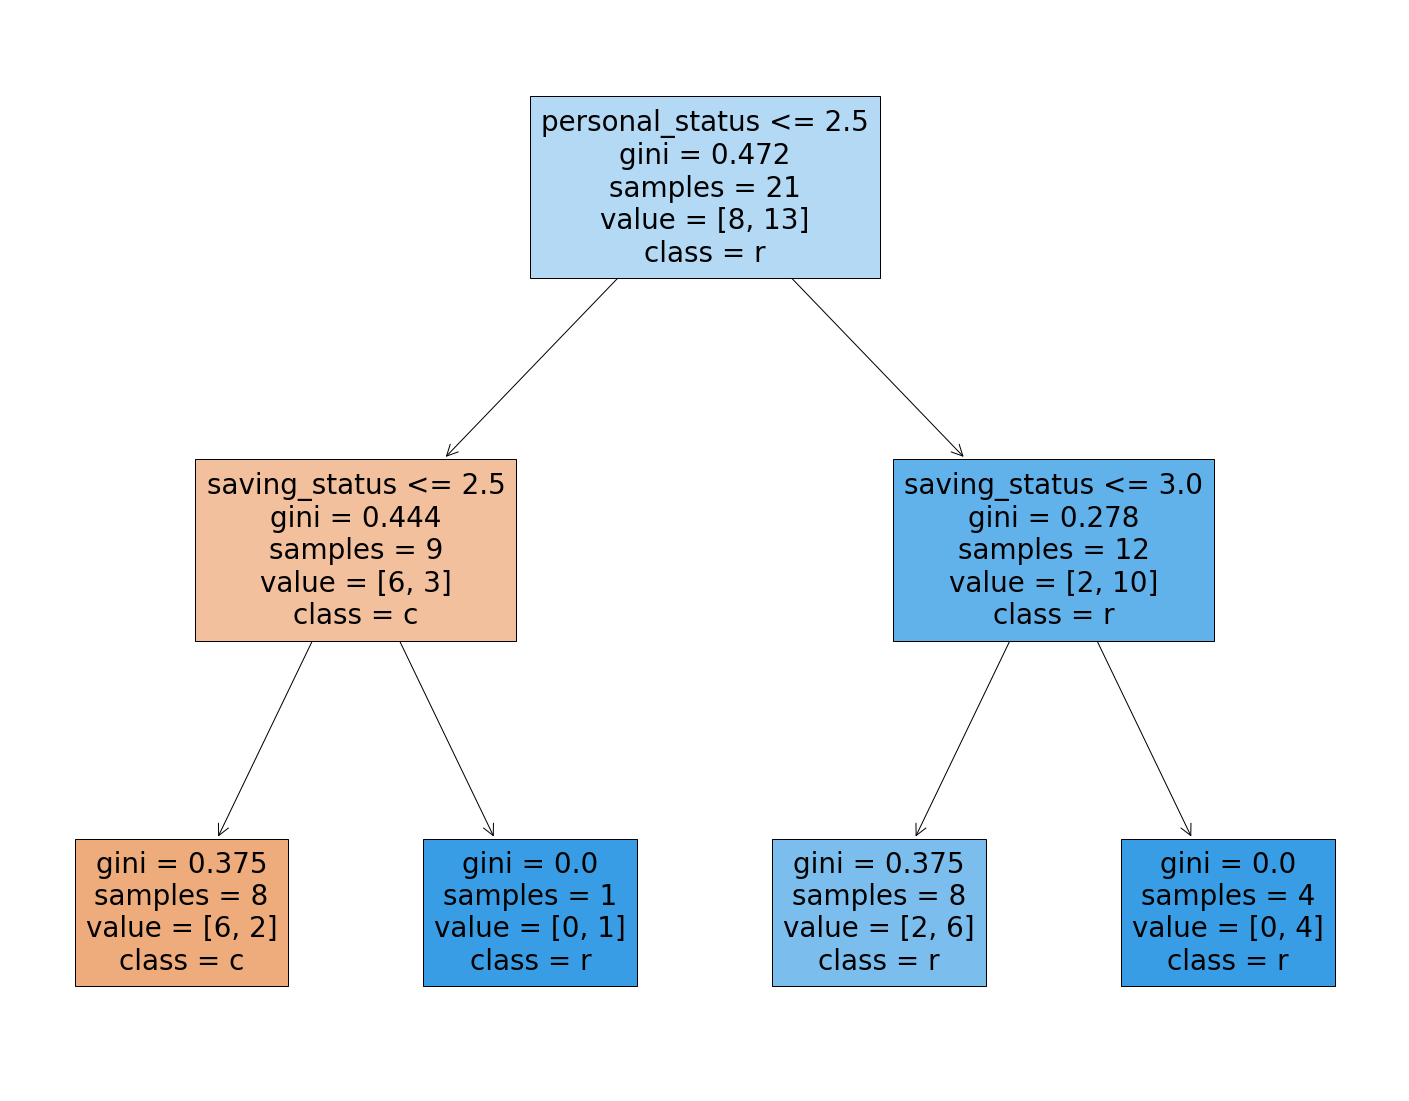

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=["personal_status", "job", "housing", "saving_status"],  
                   class_names="credit_class",
                   filled=True)